<a href="https://colab.research.google.com/github/Mirai-Kuma/DSProject/blob/JAJA-I-HEW-KAW/JA_ProjectTourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [58]:
tour = pd.read_csv('tourism_dataset.csv')

In [59]:
# Print Number of Location
con_data =  tour.groupby('Country')[['Location']].nunique().sort_values(by='Location', ascending=False)
print(con_data)

           Location
Country            
Egypt           912
India           896
France          857
USA             848
Brazil          840
Australia       830
China           806


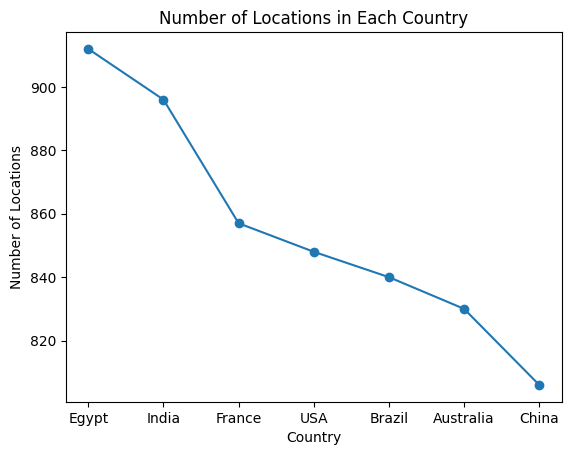

In [60]:
# Number of Location of Each Country
plt.plot(con_data.index, con_data['Location'], marker='o')
plt.xlabel("Country")
plt.ylabel("Number of Locations")
plt.title("Number of Locations in Each Country")
plt.show()

In [61]:
# Printng Category of Each Country
iPC = tour.groupby(['Category', 'Country'])[['Location']].nunique()
iPC = iPC.unstack('Category')
iPC.columns = iPC.columns.droplevel()
print(iPC)

Category   Adventure  Beach  Cultural  Historical  Nature  Urban
Country                                                         
Australia        148    148       139         134     133    128
Brazil           160    136       140         148     116    140
China            139    135       136         135     133    128
Egypt            165    155       152         157     129    154
France           124    147       148         132     164    142
India            159    153       149         147     136    152
USA              142    124       134         141     145    162


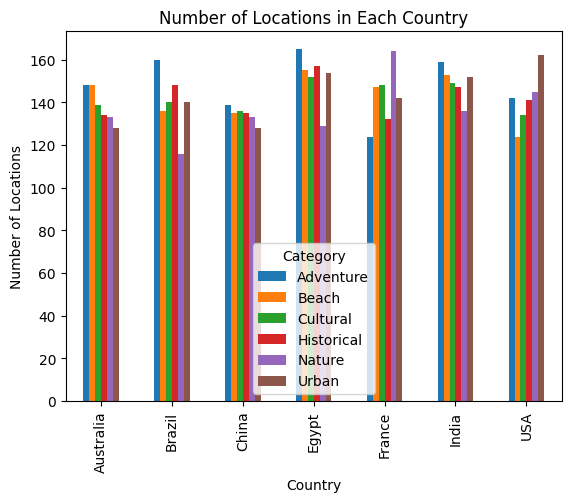

In [62]:
# Graph Category in Each Country
iPC.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Locations")
plt.title("Number of Locations in Each Country")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


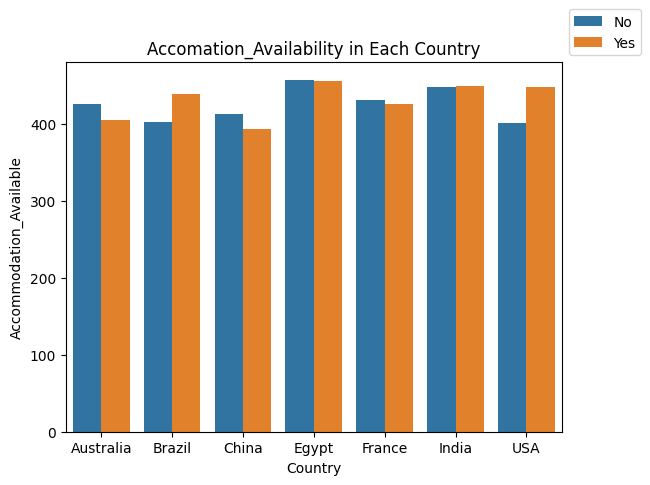

In [80]:
# Accomation_Availability in Each Country
data = tour.groupby(['Country', 'Accommodation_Available']).size().reset_index(name='Counts')
sns.barplot(data=data, x='Country', y='Counts', hue='Accommodation_Available')
plt.xlabel("Country")
plt.ylabel("Accommodation_Available")
plt.title("Accomation_Availability in Each Country")
plt.legend(loc='lower left', bbox_to_anchor=(1, 1))
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

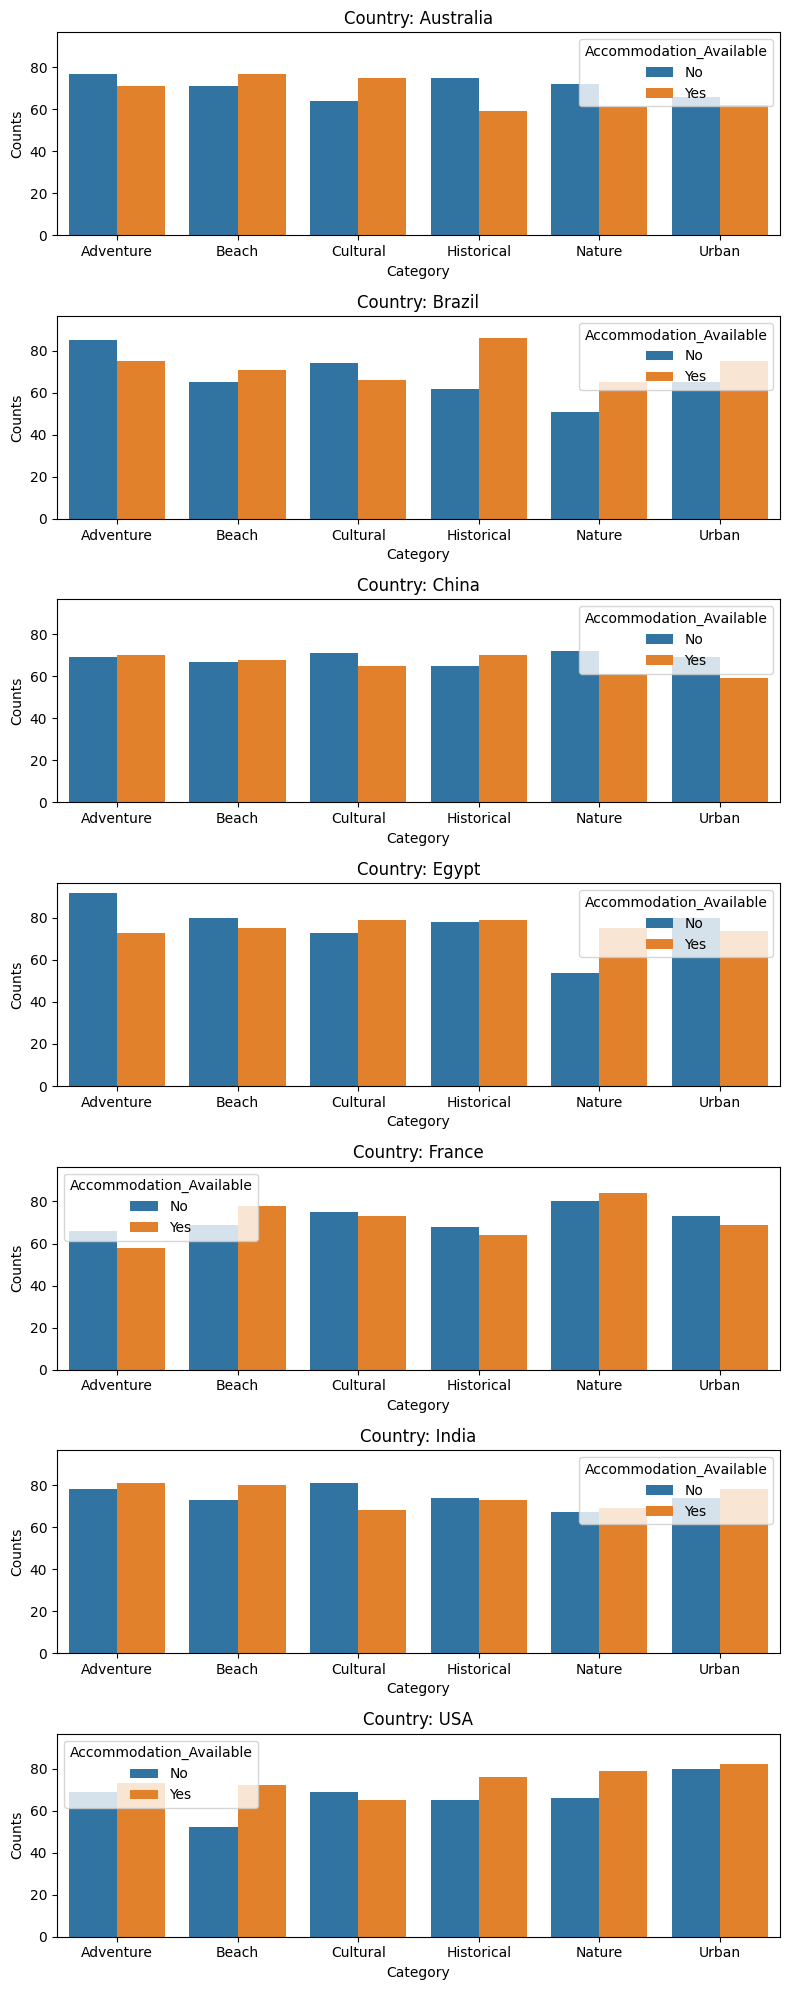

In [102]:
# Accomation_Availability in Each Category in Each Country
# Grouping the data by 'Country', 'Accommodation_Available', and 'Category' for counts
data = tour.groupby(['Country', 'Category', 'Accommodation_Available']).size().reset_index(name='Counts')

# Get the list of unique categories to loop through
categories = data['Country'].unique()

# Create subplots: 1 row and as many columns as there are unique categories
fig, axes = plt.subplots(ncols=1, nrows=len(categories), figsize=(8, 20), sharey=True)

# Plot each category in a separate subplot
for i, category in enumerate(categories):
    # Filter the data for the specific category
    category_data = data[data['Country'] == category]

    # Plot on the respective axis
    sns.barplot(data=category_data, x='Category', y='Counts', hue='Accommodation_Available', ax=axes[i])

    # Set title and labels for each subplot
    axes[i].set_title(f'Country: {category}')
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Counts")

# Adjust the layout to fit the plots
plt.tight_layout()
plt.show()

In [64]:
# Find Mean Rating Country
tour.groupby('Country')['Rating'].mean().sort_values(ascending=False)

,Rating
Country,
Brazil,3.074167
France,3.030268
Egypt,3.024298
Australia,3.019602
USA,2.984304
India,2.973158
China,2.958648


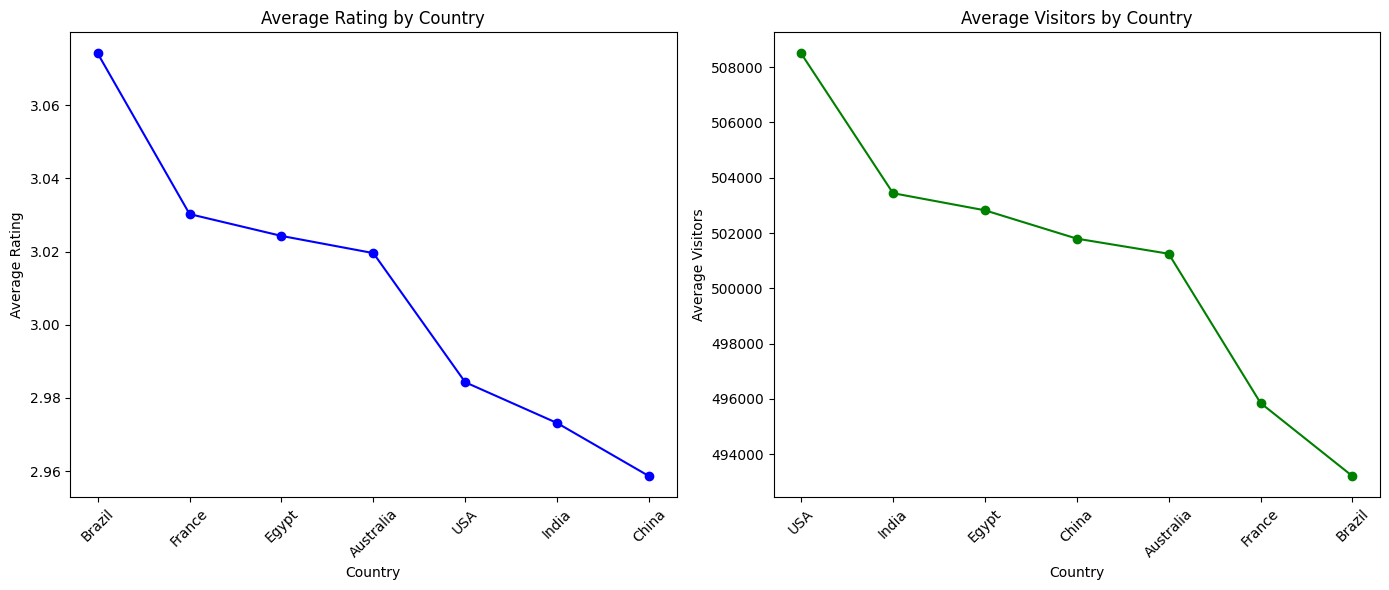

In [65]:
# Graph of Rating Country
rating_data = tour.groupby('Country')[['Rating']].mean().sort_values(by='Rating', ascending=False)
visitor_data = tour.groupby('Country')[['Visitors']].mean().sort_values(by='Visitors', ascending=False)

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # Adjusted figure size for better clarity

# Plot the first graph (Ratings by Country)
ax[0].plot(rating_data.index, rating_data['Rating'], marker='o', color='blue')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Average Rating')
ax[0].set_title('Average Rating by Country')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot the second graph (Visitors by Country)
ax[1].plot(visitor_data.index, visitor_data['Visitors'], marker='o', color='green')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Average Visitors')
ax[1].set_title('Average Visitors by Country')
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

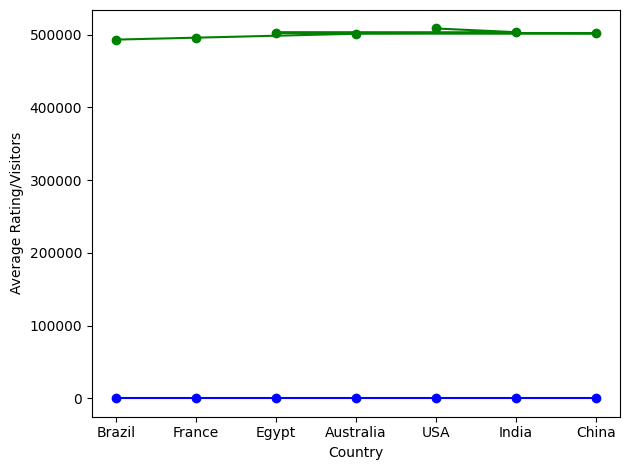

In [66]:
# Graph of Rating Country
rating_data = tour.groupby('Country')[['Rating']].mean().sort_values(by='Rating', ascending=False)
visitor_data = tour.groupby('Country')[['Visitors']].mean().sort_values(by='Visitors', ascending=False)

# Create subplots
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # Adjusted figure size for better clarity
plt.plot(rating_data.index, rating_data['Rating'], marker='o', color='blue')
plt.plot(visitor_data.index, visitor_data['Visitors'], marker='o', color='green')
plt.xlabel('Country')
plt.ylabel('Average Rating/Visitors')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()